In [11]:
import numpy as np
import matplotlib.pyplot as plt
import time

In [74]:
X1=np.random.randn(1000,2)
X2=np.random.randn(1000,2)+5

In [75]:
X1=np.hstack((np.ones((1000,1)),X1))
X2=np.hstack((np.zeros((1000,1)),X2))

In [76]:
X=np.vstack((X1,X2))

In [77]:
np.random.shuffle(X)
y=X[:,:1]
X=X[:,1:]

In [78]:
def sig(h):
    return 1/(1+np.exp(-h))

In [79]:
def cost(y,p):
    Err=[]
    for j in range(y.shape[1]):
        if y[j]==1:
            Err.append(-np.log(p[j]))
        else:
            Err.append(-np.log(1-p[j]))
    return np.sum(Err)

In [129]:
np.random.seed(200)

In [130]:
epochs=3000
eta=.00005
Error=[]
epoch=[]
w=np.random.randn(2,1)
start=time.time()
for i in range(epochs):
    p=1/(1+np.exp(-X@w))
    Error.append(cost(y,p))
    epoch.append(i)
    w=w-eta*X.T@(p-y)
end=time.time()

0.4733114242553711


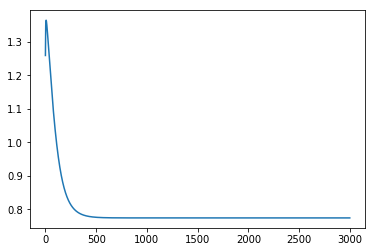

In [131]:
print(end-start)
plt.plot(epoch,Error)

In [132]:
Error[-1]

0.7744574772394167

In [133]:
epochs=6
eta=.00005
Error=[]
epoch=[]
w=np.random.randn(2,1)
start=time.time()
for i in range(epochs):
    for a in range(X.shape[0]):
        z=X[a,:].reshape(1,-1)
        p=1/(1+np.exp(-z@w))
        w=w-eta*z.T@(p-y[a,:].reshape(1,-1))
        Error.append(cost(y[a,:].reshape(1,-1),p))
end=time.time()

0.41953039169311523


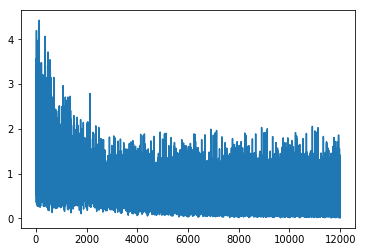

In [134]:
print(end-start)
plt.plot(range(len(Error)),Error)

In [135]:
p=1/(1+np.exp(-X@w))
cost(y,p)

0.6138717250546011